In [1]:
from ctypes import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_to_dll = "C:/Users/gautier/CLionProjects/MLP3/cmake-build-debug/libMLP3.dll"
my_lib = cdll.LoadLibrary(path_to_dll)

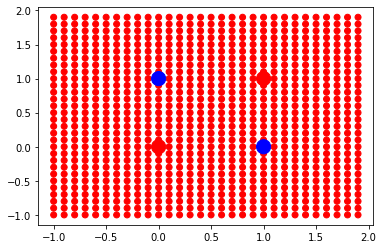

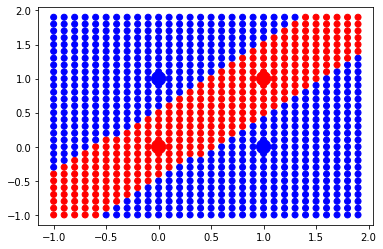

[0, 0, 1, 1, 0, 1, 1, 0]

In [3]:
def get_and_display_flattened_dataset_inputs():
    predicted_outputs = []
    for p in test_dataset:
        array_size_P = len(p)
        array_type_P = c_float * array_size_P
        arrP = array_type_P(*p)
        my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
        my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
        tmp = my_lib.predict_mlp_model_classification(model, arrP)
        np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
        predicted_outputs.append(np_arr[0])
    predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
    plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
    plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
    plt.show()
    flattened_dataset_inputs = []
    for p in dataset_inputs:
        flattened_dataset_inputs.append(p[0])
        flattened_dataset_inputs.append(p[1])
    return flattened_dataset_inputs


dataset_inputs = [
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
]

dataset_expected_outputs = [
    -1,
    -1,
    1,
    1,
]

init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
flattened_dataset_inputs = get_and_display_flattened_dataset_inputs()
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
arr_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
arr_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, array_size_flat, arr_exp,
                                                                          0.001, 100000)
get_and_display_flattened_dataset_inputs()


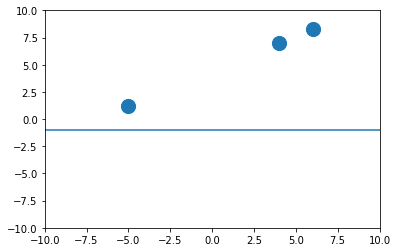

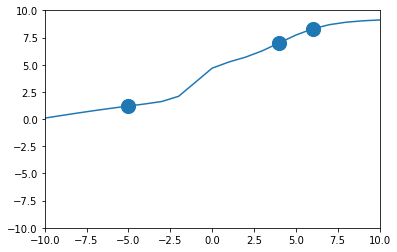

In [4]:
def display_flattened_dataset_inputs():
    test_dataset_inputs = [i for i in range(-10, 11)]
    predicted_outputs = []
    for p in test_dataset_inputs:
        array_size_P = len([p])
        array_type_P = c_float * array_size_P
        array_P = array_type_P(*[p])
        my_lib.predict_mlp_model_regression.argtypes = [c_void_p, array_type_P]
        my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
        tmp = my_lib.predict_mlp_model_regression(model, array_P)
        predicted_outputs.append(tmp[0])
    plt.plot(test_dataset_inputs, predicted_outputs)
    plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
    plt.axis([-10, 10, -10, 10])
    plt.show()


dataset_inputs = [
    [-5],
    [4],
    [6],
]

dataset_expected_outputs = [
    1.2,
    7,
    8.3
]

init = [1, 3, 1]
array_size_init = len(init)
array_type_init = c_int * array_size_init
array_init = array_type_init(*init)
my_lib.create_mlp_model.argtypes = [array_type_init, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(array_init, int(array_size_init))
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
display_flattened_dataset_inputs()
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(dataset_expected_outputs)
array_type_exp = c_float * array_size_exp
array_exp = array_type_exp(*dataset_expected_outputs)
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                  array_type_exp, c_float, c_int]
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_regression_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, array_exp,
                                                                      0.001, 100000)
display_flattened_dataset_inputs()

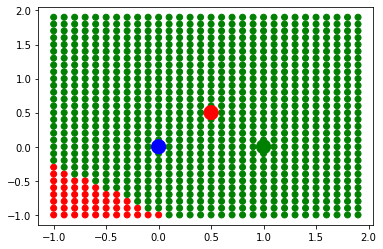

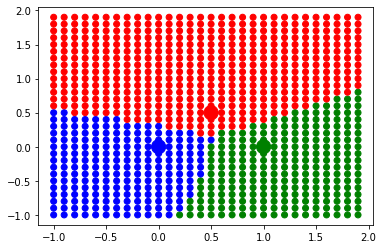

In [5]:
def display_flattened_dataset_inputs():
    predicted_outputs = []
    for p in test_dataset:
        array_size_P = len(p)
        array_type_P = c_float * array_size_P
        array_P = array_type_P(*p)
        my_lib.predict_mlp_model_classification.argtypes = [c_void_p, array_type_P]
        my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
        tmp = my_lib.predict_mlp_model_classification(model, array_P)
        np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
        predicted_outputs.append(np_arr)
    predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for
                                output in predicted_outputs]
    plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
    plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
    plt.show()


dataset_inputs = [
    [0, 0],
    [0.5, 0.5],
    [1, 0],
]

dataset_expected_outputs = [
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
]

init_tab = [2, 3, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)
my_lib.create_mlp_model.argtypes = [init_type, c_int]
my_lib.create_mlp_model.restype = c_void_p
model = my_lib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in
          dataset_expected_outputs]
my_lib.getXSize.argtypes = [c_void_p]
my_lib.restype = c_int
tmp_len = my_lib.getXSize(model)
display_flattened_dataset_inputs()
flattened_dataset_inputs = []
for p in dataset_inputs:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
flattened_dataset_outputs = []
for p in dataset_expected_outputs:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])
array_size_flat = len(flattened_dataset_inputs)
array_type_flat = c_float * array_size_flat
array_flat = array_type_flat(*flattened_dataset_inputs)
array_size_exp = len(flattened_dataset_outputs)
array_type_exp = c_float * array_size_exp
arr_exp = array_type_exp(*flattened_dataset_outputs)
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, array_type_flat, c_int,
                                                                                      array_type_exp, c_float, c_int]
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
my_lib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, array_flat, array_size_flat, arr_exp,
                                                                          0.001, 100000)
display_flattened_dataset_inputs()